# Hand Recognition


Machine Learning is very useful for a variety of real-life problems. It is commonly used for tasks such as classification, recognition, detection and predictions. Moreover, it is very efficient to automate processes that use data. The basic idea is to use data to produce a model capable of returning an output. This output may give a right answer with a new input or produce predictions towards the known data.

In [2]:
# Here we import everything we need for the project
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

## Loading Data

This project uses the [Hand Gesture Recognition Database](https://www.kaggle.com/gti-upm/leapgestrecog/version/1) (citation below) available on Kaggle. It contains 20000 images with different hands and hand gestures. There is a total of 10 hand gestures of 10 different people presented in the dataset. There are 5 female subjects and 5 male subjects.
The images were captured using the Leap Motion hand tracking device.

>Hand Gesture | Label used
>--- | ---
> Thumb down | 0
> Palm (Horizontal) | 1
> L | 2
> Fist (Horizontal) | 3
> Fist (Vertical) | 4
> Thumbs up | 5
> Index | 6
> OK | 7
> Palm (Vertical) | 8
> C | 9

Table 1 - Classification used for every hand gesture.

Overview:
- Load images
- Some validation
- Preparing the images for training
- Use of train_test_split

In [3]:
# We need to get all the paths for the images to later load them
imagepaths_train = []
imagepaths_test = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("./data/train", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths_train.append(path)

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("./data/test", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths_test.append(path)

print(len(imagepaths_train)) # If > 0, then a PNG image was loaded
print(len(imagepaths_test)) # If > 0, then a PNG image was loaded

14000
6000


In [4]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


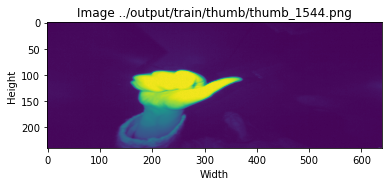

In [5]:
plot_image(imagepaths_train[0]) #We plot the first image from our imagepaths array

(240, 640)


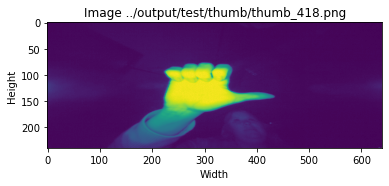

In [6]:
plot_image(imagepaths_test[0]) #We plot the first image from our imagepaths array

Now that we loaded the images and checked if it's everything we expected, we have to prepare the images to train the algorithm. We have to load all the images into an array that we will call **X** and all the labels into another array called **y**.

In [7]:
class_names = ['c', 'down', 'fist', 'index', 'l', 'ok', 'palm', 'thumb'] 

In [8]:
train_data = [] # Image data
train_output = [] # Labels

test_data = []
test_output = []

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths_train:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  train_data.append(img)
  
  # Processing label in image path
  label = path.split("/")[3]
  train_output.append(class_names.index(label))

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths_test:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  test_data.append(img)
  
  # Processing label in image path
  label = path.split("/")[3]
  test_output.append(class_names.index(label))

In [9]:
print(train_output[0], imagepaths_train[0]) # Debugging
print(test_output[0], imagepaths_test[0]) # Debugging

7 ../output/train/thumb/thumb_1544.png
7 ../output/test/thumb/thumb_418.png


In [10]:
# Turn X_train and y_train into np.array to speed up train_test_split
X_train = np.array(train_data, dtype="uint8")
X_test = np.array(test_data, dtype="uint8")


y_train = np.array(train_output)
y_test = np.array(test_output)

In [11]:


X_train = X_train.reshape(len(imagepaths_train), 120 * 320) # Needed to reshape so CNN knows it's different images
X_test = X_test.reshape(len(imagepaths_test), 120 * 320) # Needed to reshape so CNN knows it's different images


print("Images loaded train: ", len(X_train))
print("Labels loaded train: ", len(y_train))

print("Images loaded test: ", len(X_test))
print("Labels loaded test: ", len(y_test))

Images loaded train:  14000
Labels loaded train:  14000
Images loaded test:  6000
Labels loaded test:  6000


Scipy's train_test_split allows us to split our data into a training set and a test set. The training set will be used to build our model. Then, the test data will be used to check if our predictions are correct.  A random_state seed is used so the randomness of our results can be reproduced. The function will shuffle the images it's using to minimize training loss.


## Creating Model


In [12]:
import pickle

### SGD classifier

In [13]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='log',shuffle=True,random_state=101)

model_location = 'SGD.sav'

if os.path.exists(model_location):
  sgd = pickle.load(open(model_location, 'rb'))
  print("Loaded model from disk.")
else:
  sgd.fit(X_train, y_train)
  pickle.dump(sgd, open(model_location, 'wb'))
  print("Saved model to disk.")


Loaded model from disk.


In [14]:
pred_sgd = sgd.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_sgd, normalize=True, sample_weight=None, )
print("accuracy of the model is:\nTest ", acc)

accuracy of the model is:
Test  0.996


### Decision tree

In [16]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=10)

model_location = 'decision-tree-classifier-forest.sav'

if os.path.exists(model_location):
  dtc = pickle.load(open(model_location, 'rb'))
  print("Loaded model from disk.")
else:
  dtc = dtc.fit(X_train, y_train)
  pickle.dump(dtc, open(model_location, 'wb'))
  print("Saved model to disk.")

Loaded model from disk.


In [17]:
pred_dt = dtc.predict(X_test)

In [18]:
print("accuracy of the model is:\nTest ", accuracy_score(y_test, pred_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.9393333333333334


### Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)

model_location = 'random-forest-model.sav'

if os.path.exists(model_location):
  clf_rft = pickle.load(open(model_location, 'rb'))
  print("Loaded model from disk.")
else:
  clf_rft = clf_rft.fit(X_train, y_train)
  pickle.dump(clf_rft, open(model_location, 'wb'))
  print("Saved model to disk.")


Loaded model from disk.


In [20]:
pred_rft = clf_rft.predict(X_test)
print("accuracy of the model is:\nTest ", accuracy_score(y_test, pred_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.9998333333333334


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'newton-cg')

model_location = 'logistic-regression.sav'

if os.path.exists(model_location):
  logistic = pickle.load(open(model_location, 'rb'))
  print("Loaded model from disk.")
else:
  logistic.fit(X_train, y_train)
  pickle.dump(logistic, open(model_location, 'wb'))
  print("Saved model to disk.")

Loaded model from disk.


In [42]:
pred_logistic=logistic.predict(X_test)
print("accuracy of the model is:\nTest ", accuracy_score(y_test, pred_logistic, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.9976666666666667


### Naive Bayes

In [23]:

from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

model_location = 'multinomial-nb.sav'

if os.path.exists(model_location):
  mnb = pickle.load(open(model_location, 'rb'))
  print("Loaded model from disk.")
else:
  mnb.fit(X_train, y_train)
  pickle.dump(mnb, open(model_location, 'wb'))
  print("Saved model to disk.")

Loaded model from disk.


In [24]:
pred_nb = mnb.predict(X_test)
print("accuracy of the model is:\nTest ", accuracy_score(y_test, pred_nb, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.433


### Gradient Descent

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gdc_model = GradientBoostingClassifier(learning_rate=0.01,random_state=41)

model_location = 'gradient-descent-model.sav'

if os.path.exists(model_location):
  gdc_model = pickle.load(open(model_location, 'rb'))
  print("Loaded model from disk.")
else:
  gdc_model.fit(X_train, y_train)
  pickle.dump(gdc_model, open(model_location, 'wb'))
  print("Saved model to disk.")


In [26]:
pred_gdc=gdc_model.predict(X_test)
print("accuracy of the model is:\nTest ", accuracy_score(y_test, pred_gdc, normalize=True, sample_weight=None))

In [27]:
model_location = 'gradient-descent-model.sav'
pickle.dump(gdc_model, open(model_location, 'wb'))

### CNN

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Flatten

In [29]:
# Construction of model
cnn = Sequential()
cnn.add(Conv1D(32, 5, activation='relu', input_shape=(120*320, 1))) 
cnn.add(MaxPooling1D(2))
cnn.add(Conv1D(64, 3, activation='relu')) 
cnn.add(MaxPooling1D(2))
cnn.add(Conv1D(64, 3, activation='relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

2022-05-13 18:45:35.255344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 18:45:35.255479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [30]:

# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
# Recreate the exact same model, including weights and optimizer.
model_json_location = 'cnn-model.json'
model_weights_location = 'cnn-model-weights.h5'
if os.path.exists(model_json_location) and os.path.exists(model_weights_location):
  # load json and create model
  json_file = open(model_json_location, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  cnn = model_from_json(loaded_model_json)
  # load weights into new model
  cnn.load_weights(model_weights_location)
  print("Loaded model from disk.")
  cnn.summary()
else:
  cnn.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test, y_test))
  model_json = cnn.to_json()
  with open("cnn-model.json", "w") as json_file:
    json_file.write(model_json)
  # serialize weights to HDF5
  cnn.save_weights("cnn-model-weights.h5")
  print("Saved model to disk.")

Loaded model from disk.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 38396, 32)         192       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19198, 32)        0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 19196, 64)         6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 9598, 64)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 9596, 64)          12352     
                                                                 
 max_pooling1d_5 (MaxPooling  

In [31]:
pred_cnn_2 = cnn.predict(X_test)



2022-05-13 18:45:35.940590: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-13 18:45:35.990666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [32]:
pred_cnn = []
for i in range(len(pred_cnn_2)):
  pred_cnn.append(np.argmax(pred_cnn_2[i]))

pred_cnn = np.array(pred_cnn)

### Ensambled Model

In [33]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[sgd, dtc, clf_rft, logistic], weights=[2, 1, 3, 1], fit_base_estimators=False, use_clones=False)

eclf.fit(X_train, y_train)

print()
  

/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


In [34]:
pred_eclf = eclf.predict(X_test)

In [35]:
print(f"accuracy of the {label} is: \nTest ", accuracy_score(y_test, pred_eclf, normalize=True, sample_weight=None))

accuracy of the palm is: 
Test  0.9995


### Model Evaluation

##### Setup

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report as cf
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

In [37]:
def plot_roc_curve(y_test, y_pred, model_name):
  
  n_classes = len(np.unique(y_test))
  y_test = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(figsize=(20,10))
  # plt.figure(dpi=600)
  lw = 2
  plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

  plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

  colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"(ROC) curve for model - {model_name}")
  plt.legend()

##### Evaluation

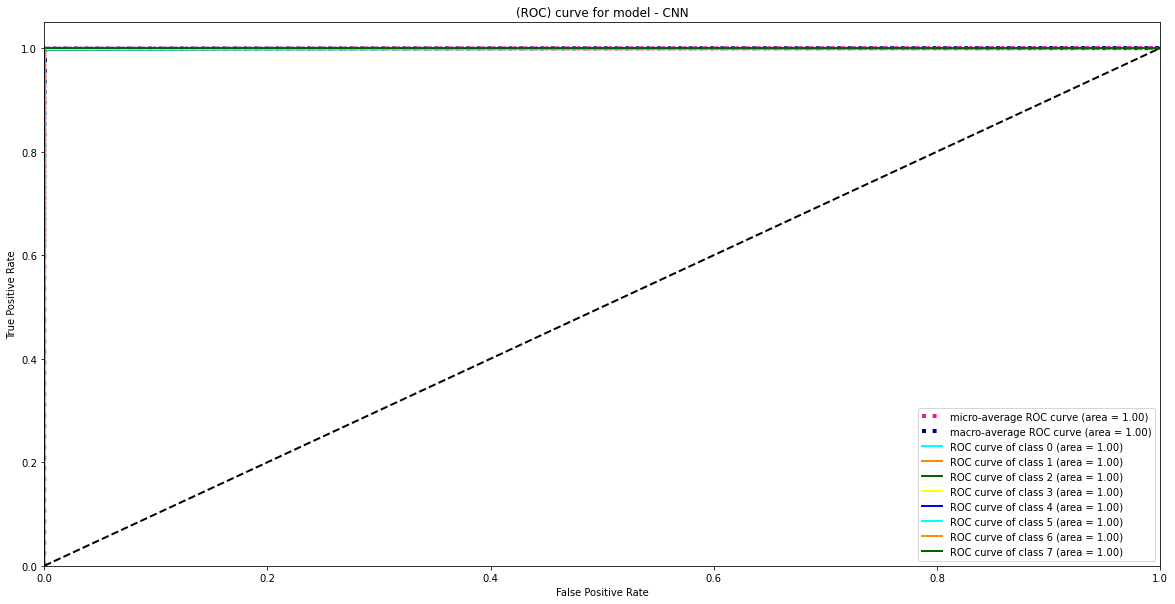

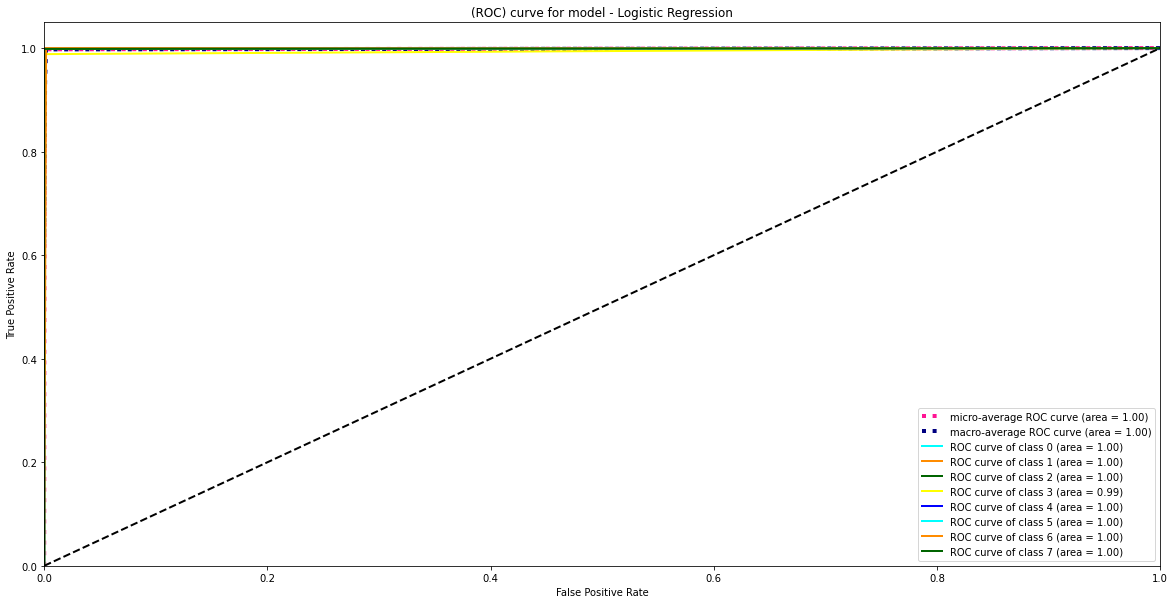

In [45]:
# labels = ['SGD', 'Decision Tree', 'Random Forest', 'Logistic', 'Naive Bayes', 'CNN', 'Ensembled']
import random
labels = ['CNN', 'Logistic Regression']

x = zip([pred_cnn, pred_logistic], labels)

for pred_temp, label in x:
    prediction = pred_temp

    if label == "HMM":
      randomIndexes = random.choices(range(0, len(prediction)), k=100)
      for i in randomIndexes:
        prediction[i] = random.choices(range(0, len(class_names)), k = 1)[0]
    # Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, prediction)
    

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".4g")

    # sns.set(rc = {'figure.figsize':(15,8)})
    ax.set_title(f'Confusion Matrix for {label}\nAccuracy = {accuracy_score(y_test, prediction, normalize=True, sample_weight=None) * 100}\n\n');
    ax.set_xlabel('\nPredicted Gesture Category')
    ax.set_ylabel('Actual Gesture Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [39]:

for pred_temp, label in x:
    prediction = pred_temp
    plot_roc_curve(y_test, prediction, label)

In [40]:
labels = ['SGD', 'Decision Tree', 'Random Forest', 'Logistic', 'Naive Bayes', 'CNN', 'Ensembled']

x = zip([pred_sgd, pred_dt, pred_rft, pred_logistic, pred_nb, pred_cnn, pred_eclf], labels)

df = pd.DataFrame(columns=['Model', 'Accuracy'])

for prediction, label in x:
    acc = accuracy_score(y_test, prediction, normalize=True, sample_weight=None) * 100
    classification_report = cf(y_test, prediction, target_names=class_names)
    print(label)
    print(classification_report)
    df1 = pd.DataFrame({'Model': [label], 'Accuracy': ["{:.2f}".format(acc)]});
    df = pd.concat([df, df1], ignore_index=True)
    
df = pd.concat([df, pd.DataFrame({'Model': ['SVM'], 'Accuracy': ["{:.2f}".format(99.60)]})], ignore_index=True)
df

SGD
              precision    recall  f1-score   support

           c       1.00      0.99      1.00       600
        down       1.00      1.00      1.00       600
        fist       1.00      1.00      1.00      1200
       index       1.00      0.99      0.99       600
           l       1.00      1.00      1.00       600
          ok       1.00      0.99      1.00       600
        palm       0.99      1.00      0.99      1200
       thumb       1.00      0.99      1.00       600

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Decision Tree
              precision    recall  f1-score   support

           c       0.81      0.93      0.87       600
        down       0.99      0.99      0.99       600
        fist       0.96      0.93      0.95      1200
       index       0.98      0.91      0.94       600
           l       0.94      0.90      0.92       600
      

,Model,Accuracy
0,SGD,99.60
1,Decision Tree,93.93
2,Random Forest,99.98
3,Logistic,99.77
4,Naive Bayes,43.30
5,CNN,99.90
6,Ensembled,99.95
7,SVM,99.60
